In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
# 解决坐标轴刻度负号乱码
plt.rcParams['axes.unicode_minus'] = False

# 解决中文乱码问题
plt.rcParams['font.sans-serif'] = ['Simhei']

# 设置图片大小，单位为英寸
plt.rc('figure', figsize=(18, 6))

In [16]:
df = pd.read_csv('zuzhang.csv',index_col=0)

In [28]:
df['low'] =df.salary.map(lambda x : x.split('-')[0])
df['high'] =df.salary.map(lambda x : x.split('-')[1][:-3])
df['unit'] =df.salary.map(lambda x : x.split('-')[1][-3])

In [29]:
df.low = df.low.astype(float)
df.high = df.high.astype(float)

In [21]:
df['city'] = df.place.map(lambda x:x.split('-')[0])

In [32]:
low= df[df.unit=='万'].loc[:,'low']*10
high= df[df.unit=='万'].loc[:,'high']*10
ind = df[df.unit=='万'].index.tolist()
df.iloc[ind, 5] = low
df.iloc[ind, 6] = high
df['unit'] = '千'

In [37]:
df['mean'] = (df.low + df.high)/2

In [38]:
df[df.city=='北京']

,title,company,place,salary,publish_time,low,high,unit,city,mean
34,催收组长,上海永嘉信风管理有限公司,北京,0.6-1.2万/月,11-25,6.0,12.0,千,北京,9.0
207,电话客服无销售压力,上海浚汰商务咨询有限公司,北京-朝阳区,0.8-1万/月,11-26,8.0,10.0,千,北京,9.0


In [39]:
df.head()

,title,company,place,salary,publish_time,low,high,unit,city,mean
0,催收组长（高薪+优厚福利））,深圳万融盛世企业管理咨询有限公司...,宁波-江北区,0.8-2万/月,11-26,8.0,20.0,千,宁波,14.0
1,电话催收组长,西安维骏金融服务外包有限公司,西安-莲湖区,0.8-1万/月,11-26,8.0,10.0,千,西安,9.0
2,催收组长,佛山市恒鑫商务服务有限公司广州分...,广州-白云区,0.9-1.5万/月,11-26,9.0,15.0,千,广州,12.0
3,催收组长,深圳市恒源昊信息科技有限公司长沙...,长沙-芙蓉区,0.8-1万/月,11-26,8.0,10.0,千,长沙,9.0
4,A电话催收组长+正规内催带组经验,深圳市汇合发展有限公司,武汉,6-8千/月,11-26,6.0,8.0,千,武汉,7.0


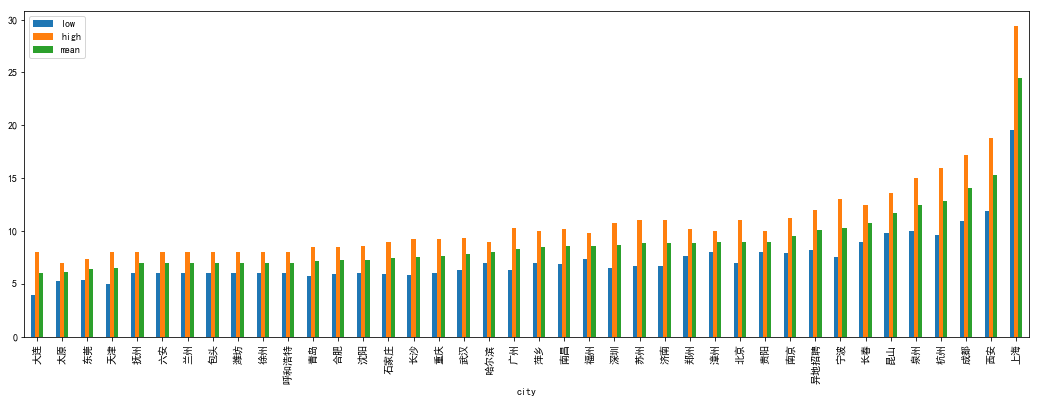

In [40]:
citystats = df.groupby('city').mean().sort_values(by='mean')
citystats.plot(kind='bar')

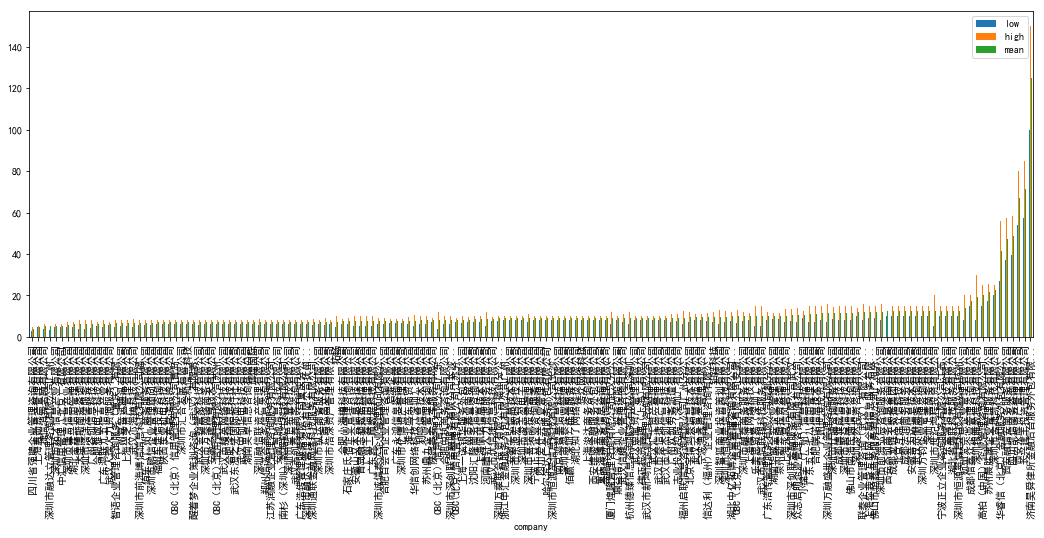

In [163]:
companystats = df.groupby('company').mean().sort_values(by='mean')
companystats.plot(kind='bar')

In [164]:
df.groupby('company').mean().sort_values(by='mean')

,low,high,mean
company,,,
四川省强聘企业管理咨询有限公司,3.000000,4.500000,3.750000
上海惠勋资产管理有限公司,4.500000,5.000000,4.750000
捷信消费金融有限公司,4.000000,6.000000,5.000000
深圳市融达立管理咨询有限公司广州...,3.350000,7.000000,5.175000
深圳市拓才信息产业有限公司,4.500000,6.000000,5.250000
中汇信用管理（北京）有限公司,4.500000,6.000000,5.250000
深圳市谨言信息产业有限公司,4.500000,6.912621,5.706311
湖北金霖兴信用管理有限公司,4.785714,7.142857,5.964286
大连博斯商务咨询有限公司,4.000000,8.000000,6.000000
